In [1]:
#Tickers: 'FB: Facebook', 'TWTR;Twitter', 'ORCL:Oracle', 'EMC: EMC Corporation'
# Questions to answer:
# 1: What was the change in price of the stock over time?
# 2: What was the average daily return of the stock over time?
# 3: What was the moving average of the respective stocks?
# 4: What was the correlation between the daily returns of selected stocks?
# 5: How much value do we put at risk by investing in a selection of stocks?
# 6: How can we attempt to predict the future stock behavior?

In [117]:
#Data Imports
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

# Viz Imports
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# For reading stock data from yahoo
from pandas.io.data import DataReader
import pandas.io.data as pdweb

# For time 
from datetime import datetime

# For division
from __future__ import division

import warnings
warnings.filterwarnings("ignore")

In [3]:
#Let's grab some data from yahoo

techlist=['FB','TWTR','ORCL','EMC']

end=datetime.now()
start=datetime(end.year-3,end.month,end.day)

for stock in techlist:
    globals()[stock] = DataReader(stock,'yahoo',start,end)

In [15]:
adj_close=pdweb.get_data_yahoo(techlist,start,end)['Adj Close']

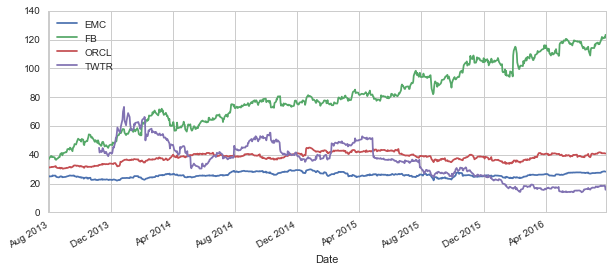

In [17]:
#Let's see the Adj Closing prices for the last 3 years
adj_close.plot(legend=True, figsize=(10,4))

In [18]:
volume=pdweb.get_data_yahoo(techlist,start,end)['Volume']

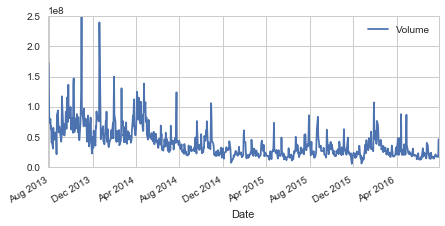

In [25]:
#FB Volume over last 3 years
FB['Volume'].plot(legend=True,figsize=(7,3))

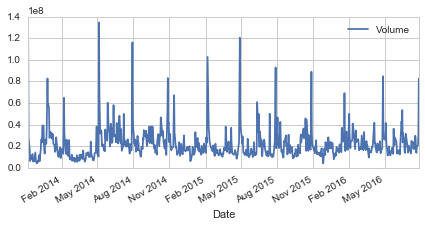

In [26]:
#TWTR Volume over last 3 years
TWTR['Volume'].plot(legend=True,figsize=(7,3))

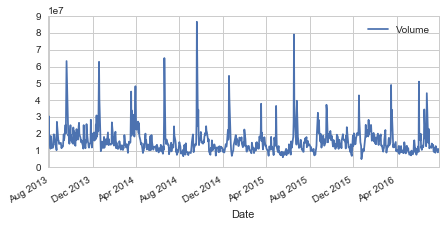

In [27]:
#ORCL Volume over last 3 years
ORCL['Volume'].plot(legend=True,figsize=(7,3))

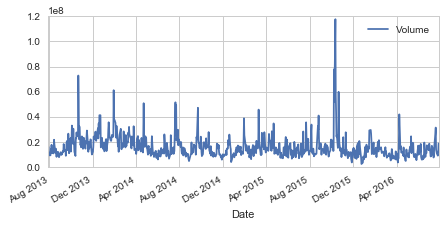

In [28]:
#EMC Volume over last 3 years
EMC['Volume'].plot(legend=True,figsize=(7,3))

In [118]:
# MA = Moving Average
ma_day = [10,20,50]

for ma in ma_day:
    column_name = "MA for %s Days" %(str(ma))
    FB[column_name]=pd.rolling_mean(FB['Adj Close'],ma)
    TWTR[column_name]=pd.rolling_mean(TWTR['Adj Close'],ma)
    TWTR[column_name]=pd.rolling_mean(ORCL['Adj Close'],ma)
    ORCL[column_name]=pd.rolling_mean(ORCL['Adj Close'],ma)

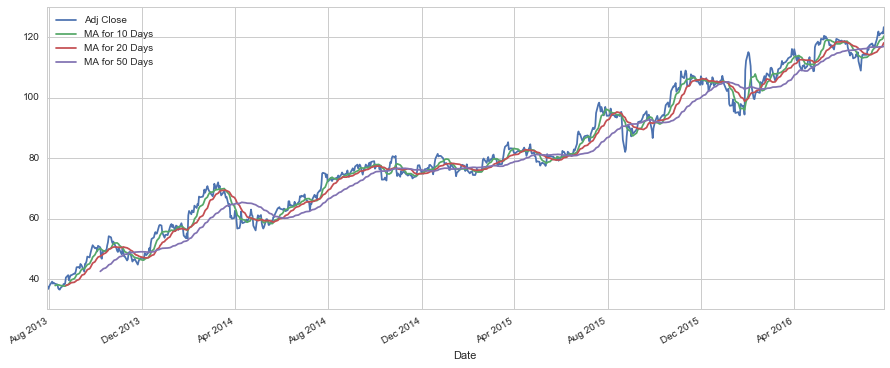

In [55]:
FB[['Adj Close', 'MA for 10 Days','MA for 20 Days','MA for 50 Days']].plot(subplots=False,figsize=(15,6))

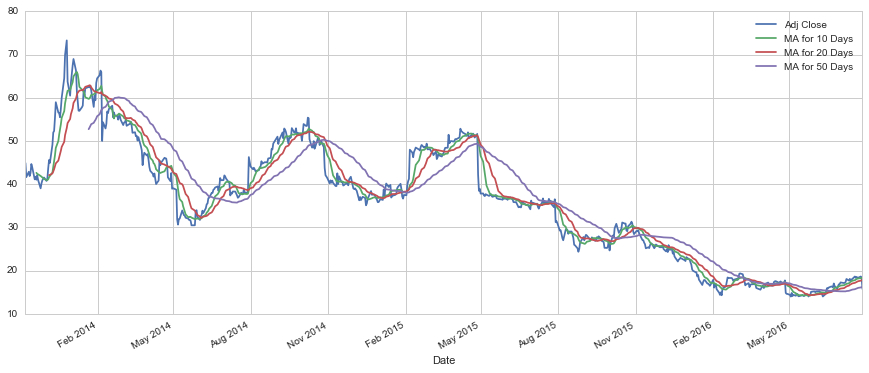

In [57]:
TWTR[['Adj Close', 'MA for 10 Days','MA for 20 Days','MA for 50 Days']].plot(subplots=False,figsize=(15,6))

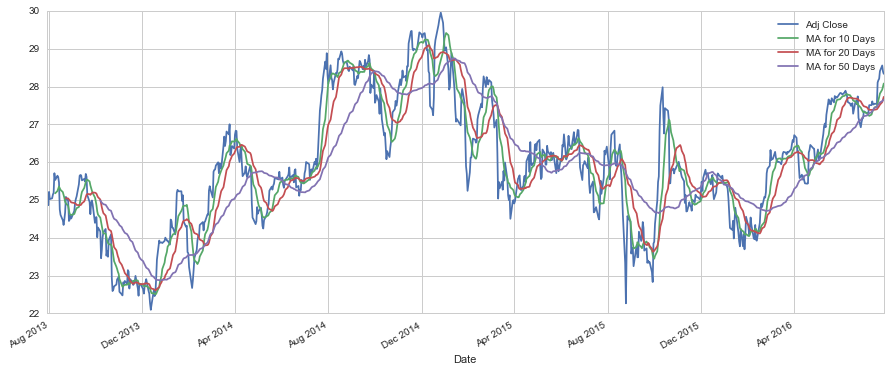

In [58]:
EMC[['Adj Close', 'MA for 10 Days','MA for 20 Days','MA for 50 Days']].plot(subplots=False,figsize=(15,6))

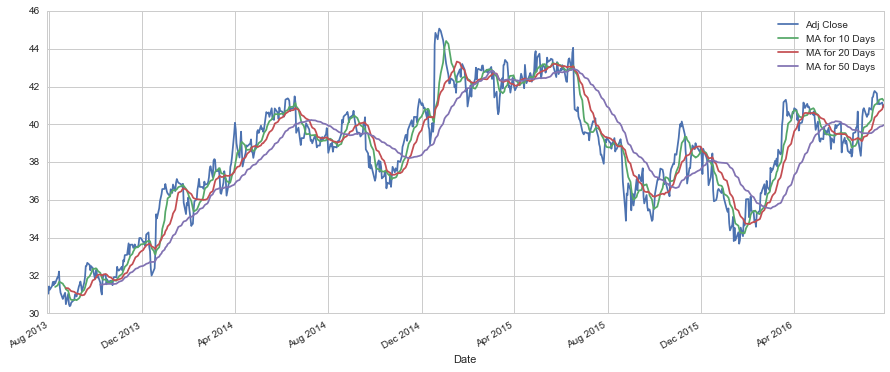

In [59]:
ORCL[['Adj Close', 'MA for 10 Days','MA for 20 Days','MA for 50 Days']].plot(subplots=False,figsize=(15,6))

In [60]:
daily_return=adj_close.pct_change()

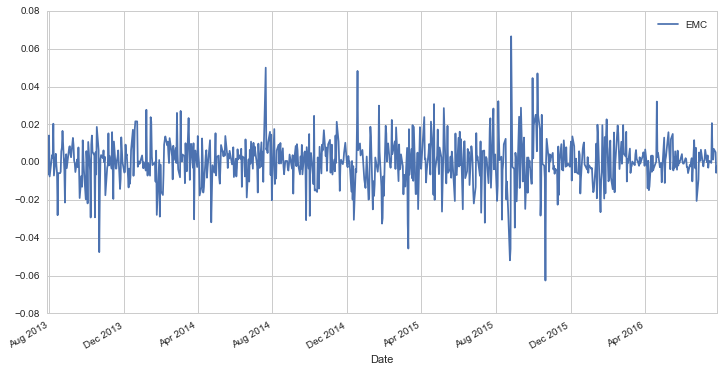

In [63]:
daily_return['EMC'].plot(legend=True, subplots=False,figsize=(12,6))

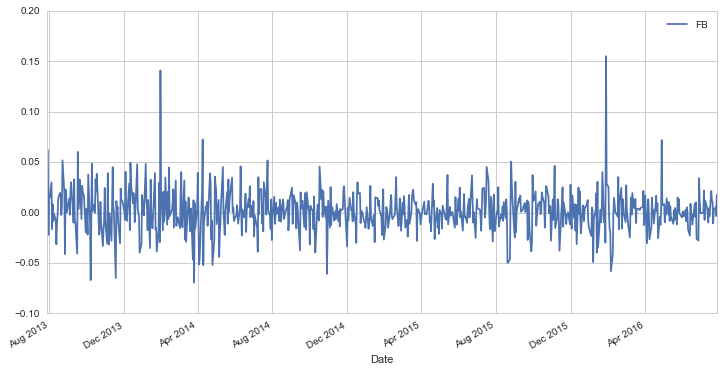

In [64]:
daily_return['FB'].plot(legend=True, subplots=False,figsize=(12,6))

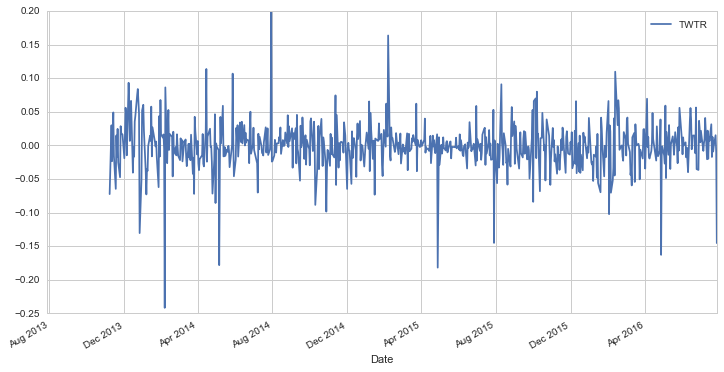

In [69]:
daily_return['TWTR'].plot(legend=True, subplots=False,figsize=(12,6))

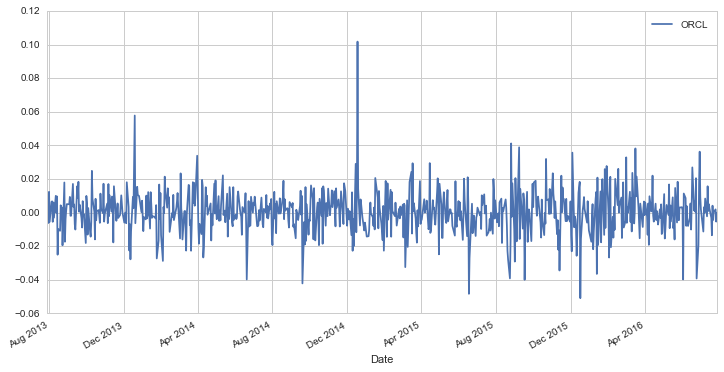

In [66]:
daily_return['ORCL'].plot(legend=True, subplots=False,figsize=(12,6))

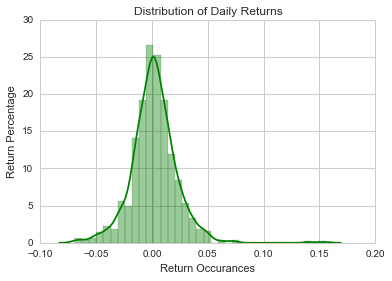

In [78]:
fig=sns.distplot(daily_return['FB'].dropna(),bins=35,color='green')
fig.set(xlabel='Return Occurances',ylabel='Return Percentage',title='Distribution of Daily Returns')

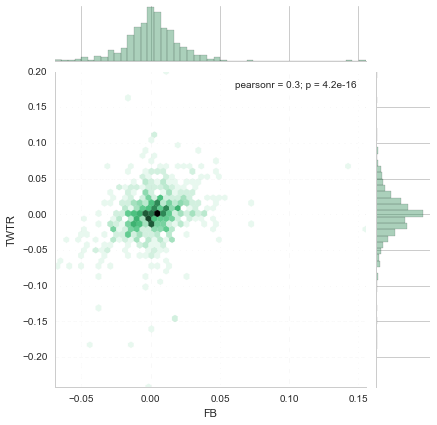

In [84]:
sns.jointplot('FB','TWTR',daily_return,kind='hex',color='seagreen')

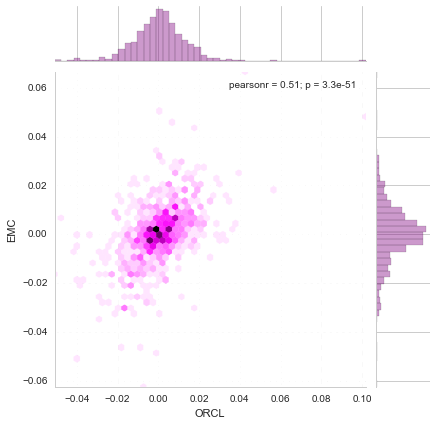

In [85]:
sns.jointplot('ORCL','EMC',daily_return,kind='hex',color='purple')

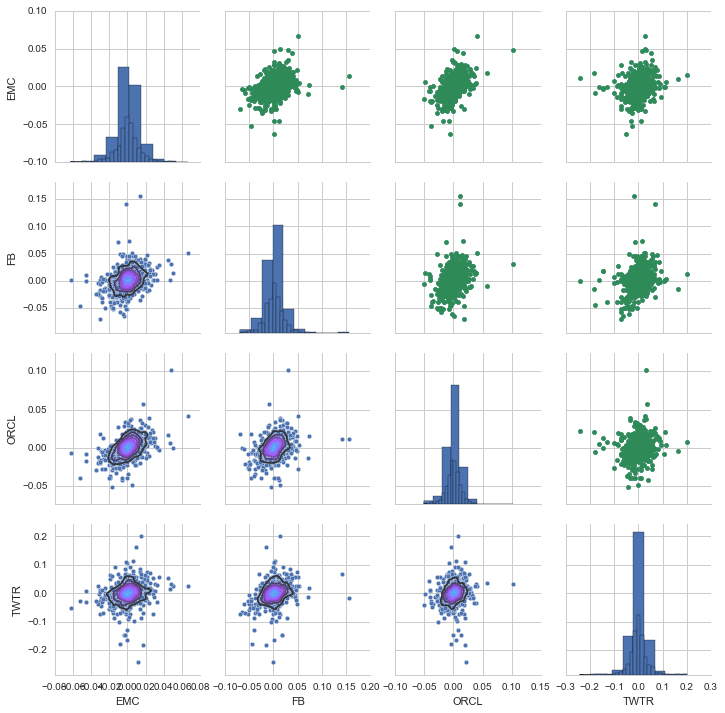

In [92]:
returns_fig=sns.pairplot(daily_return.dropna())
returns_fig.map_upper(plt.scatter,color='seagreen')
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')
returns_fig.map_diag(plt.hist,bins=30)

#greatest loss/gain that could potentially occur in a day at 95% confidence.

In [93]:
daily_return['EMC'].quantile(.05)

-0.020182944367677379

In [94]:
daily_return['TWTR'].quantile(.05)

-0.05236654314981324

In [95]:
daily_return['FB'].quantile(.05)

-0.029984651466054613

In [106]:
daily_return['ORCL'].quantile(.05)

-0.01927441654495261

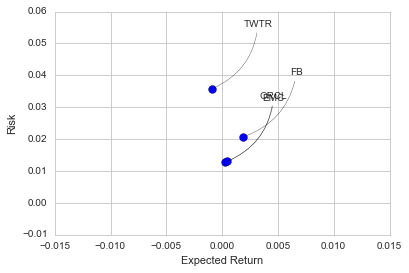

In [105]:
#based on my personal tolerence for risk I would invest in FaceBook

area=np.pi * 20

plt.scatter(daily_return.mean(),daily_return.std(),s=area)
plt.xlabel('Expected Return')
plt.ylabel('Risk')

for label, x, y in zip(daily_return.columns, daily_return.mean(), daily_return.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (60, 60),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-.3'))

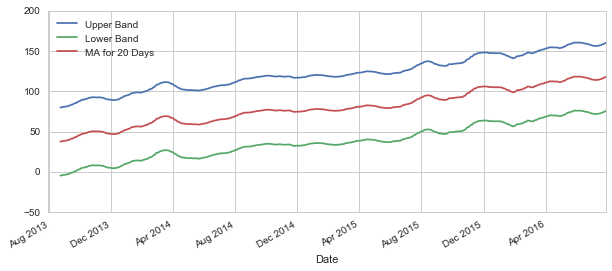

In [148]:
#Simple Bollinger Band Calculations

FB['MA for 20 Days']=FB['MA for 20 Days'].dropna()
K=2
FB_std=FB['MA for 20 Days'].std()

FB['Upper Band'] = FB['MA for 20 Days'].dropna() + K*FB_std
FB['Lower Band'] = FB['MA for 20 Days'].dropna() - K*FB_std

FB[['Upper Band','Lower Band','MA for 20 Days']].plot(subplots=False,figsize=(10,4))

In [151]:
#Monte Carol Model for Facebook

days=365
delta = 1/days
mu=daily_return['FB'].mean()
sigma=daily_return['FB'].std()

In [153]:
def monte_carlo (start_price,days,mu,sigma):
    price=np.zeros(days)
    price[0]=start_price
    shock=np.zeros(days)
    drift=np.zeros(days)
    
    for x in xrange (1,days):
        shock[x]=np.random.normal(loc=mu*delta,scale=sigma*np.sqrt(delta))
        drift[x]=mu*delta
        price[x]=price[x-1]+(price[x-1]*(drift[x]+shock[x]))
        
    return price
        
        

In [157]:
FB.head(1)

,Open,High,Low,Close,Volume,Adj Close,column_name,MA for 10 Days,MA for 20 Days,MA for 50 Days,Upper Band,Lower Band
Date,,,,,,,,,,,,
2013-07-29,34.07,35.630001,34.009998,35.43,124718800,35.43,NaN,NaN,NaN,NaN,NaN,NaN


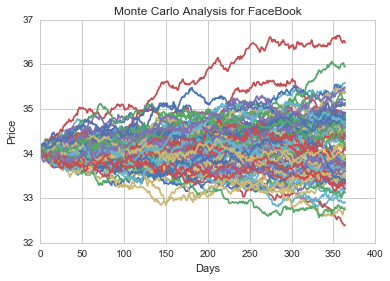

In [161]:
start_price=34.07

for run in xrange(100):
    plt.plot(monte_carlo(start_price,days,mu,sigma))
    
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis for FaceBook')

In [162]:
runs=10000

simulations = np.zeros(runs)

for run in xrange(runs):
    simulations[run] = monte_carlo(start_price,days,mu,sigma)[days-1]

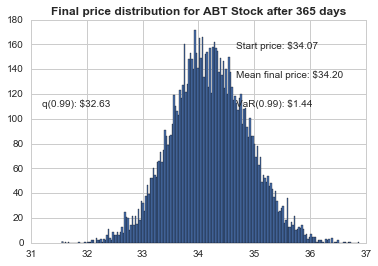

In [165]:
q=np.percentile(simulations,1)

plt.hist(simulations,bins=200)
plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price)
# Mean ending price
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))

# Display 1% quantile
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)


# Title
plt.title(u"Final price distribution for ABT Stock after %s days" % days, weight='bold');
